## Neural Networks in PyTorch
- Define NN model
- Train
- Test

Input → [Hidden Layer → Activation] → Output




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


# Class in Python

In [ ]:
class Calculator:
  def __init__(self):
    print("Calculator ready")

  def add(self, a, b):
    return a + b

calc1 = Calculator()
print(calc1.add(2,3))

Calculator ready
5


# Define the neural network as a class in PyTorch

In [ ]:
class ShallowNN(nn.Module):
  def __init__(self):
    super(ShallowNN,self).__init__()
    self.hidden = nn.Linear(1,10)
    self.output = nn.Linear(10,1)

  def forward(self, x):
    x = torch.relu(self.hidden(x))
    x = self.output(x)
    return x

# Initialized model
model = ShallowNN().to(device)


# Train the neural network

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

x = torch.linspace(-3, 3, 100).unsqueeze(1).to(device)
y_true = 2 * x + 1 + 0.5 * torch.randn(x.size()).to(device)

#Train
epochs = 20

for epoch in range(epochs):
  model.train()

  y_pred = model(x)
  loss = loss_fn(y_pred, y_true)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"epoch {epoch} completed.")

print("Learned weights:", model.hidden.weight)
print("Learned bias:", model.hidden.bias)


epoch 0 completed.
epoch 1 completed.
epoch 2 completed.
epoch 3 completed.
epoch 4 completed.
epoch 5 completed.
epoch 6 completed.
epoch 7 completed.
epoch 8 completed.
epoch 9 completed.
epoch 10 completed.
epoch 11 completed.
epoch 12 completed.
epoch 13 completed.
epoch 14 completed.
epoch 15 completed.
epoch 16 completed.
epoch 17 completed.
epoch 18 completed.
epoch 19 completed.
Learned weights: Parameter containing:
tensor([[ 1.0136],
        [ 0.0403],
        [ 0.6346],
        [ 0.6110],
        [ 0.2457],
        [-1.0299],
        [-0.9485],
        [-0.2490],
        [-0.1706],
        [-0.9753]], requires_grad=True)
Learned bias: Parameter containing:
tensor([ 0.5563,  0.2840,  0.6335,  0.7648,  0.7136,  1.0131, -0.4562,  0.5804,
        -0.5533,  0.2095], requires_grad=True)


# Plot

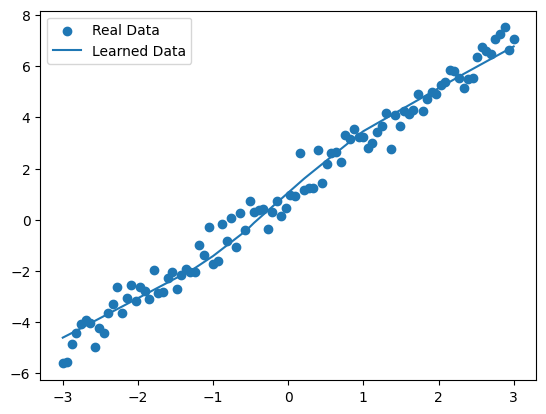

In [ ]:
model.eval()

with torch.no_grad():
  y_pred = model(x)

plt.scatter(x.cpu(), y_true.cpu(), label='Real Data')
plt.plot(x.cpu(), y_pred.cpu(), label='Learned Data')
plt.legend()
plt.show()

# Exercise 1: Try sigmoid

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set seed
torch.manual_seed(42)

# Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model with Sigmoid
class DeepNet(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
        super(DeepNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dims[1], hidden_dims[2]),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dims[2], output_dim),
        )

    def forward(self, x):
        return self.layers(x)

model = DeepNet(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print(model)


loss = nn.CrossEntropyLoss()


DeepNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Sigmoid()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Sigmoid()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


# Make a deep neural network model

Input → [Linear → ReLU] → [Linear → ReLU] → [Linear → ReLU] → Output



In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

class DeepNet(nn.Module):
  def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
    super(DeepNet, self).__init__()
    self.layers= nn.Sequential(
        nn.Linear(input_dim, hidden_dims[0]),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[0], hidden_dims[1]),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[1], hidden_dims[2]),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[2], output_dim)
    )

    def forward(self, x):
      return self.layers(x)

model = DeepNet(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print(model)

# Train

DeepNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [ ]:
loss = nn.CrossEntropyLoss()

# Exercise 2: Try sigmoid and tanh

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set seed
torch.manual_seed(42)

# Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model with Sigmoid & Tanh
class DeepNet_Mixed(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
        super(DeepNet_Mixed, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.Tanh(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dims[1], hidden_dims[2]),
            nn.Tanh(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dims[2], output_dim)
        )

    def forward(self, x):
        return self.layers(x)


model = DeepNet_Mixed(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


DeepNet_Mixed(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Sigmoid()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Tanh()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


# Exercise 3: Try other datsets


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
from torchvision import datasets
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)

# California Housing (Regression)
cal = fetch_california_housing()
X, y = cal.data, cal.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_t  = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1,1).to(device)
y_test_t  = torch.tensor(y_test, dtype=torch.float32).view(-1,1).to(device)

model_seq_reg = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.Tanh(),
    nn.Dropout(0.3),
    nn.Linear(64, 32),
    nn.Sigmoid(),
    nn.Dropout(0.3),
    nn.Linear(32, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_seq_reg.parameters(), lr=0.01)

for epoch in range(200):
    optimizer.zero_grad()
    y_pred = model_seq_reg(X_train_t)
    loss = loss_fn(y_pred, y_train_t)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f"Seq-Reg Epoch {epoch+1} | Loss: {loss.item():.4f}")


# MNIST (Classification)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)

model_seq_cls = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.Tanh(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.Sigmoid(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.Tanh(),
    nn.Linear(64, 10)
).to(device)

loss_fn_cls = nn.CrossEntropyLoss()
optimizer_cls = torch.optim.Adam(model_seq_cls.parameters(), lr=0.001)

for epoch in range(3):
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer_cls.zero_grad()
        out = model_seq_cls(batch_X)
        loss = loss_fn_cls(out, batch_y)
        loss.backward()
        optimizer_cls.step()
    print(f"Seq-Cls Epoch {epoch+1} | Loss: {loss.item():.4f}")


Seq-Reg Epoch 50 | Loss: 0.6539
Seq-Reg Epoch 100 | Loss: 0.4370
Seq-Reg Epoch 150 | Loss: 0.3961
Seq-Reg Epoch 200 | Loss: 0.3797


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 548kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.53MB/s]


Seq-Cls Epoch 1 | Loss: 0.1053
Seq-Cls Epoch 2 | Loss: 0.1517
Seq-Cls Epoch 3 | Loss: 0.1805
